In [ ]:
pip install opencv-python albumentations


In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
from glob import glob
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
def apply_clahe(image):
    # Convert the image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Split the LAB image into channels
    l, a, b = cv2.split(lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge the CLAHE enhanced L channel back with a and b channels
    limg = cv2.merge((cl, a, b))

    # Convert LAB back to BGR color space
    enhanced_image = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return enhanced_image


In [ ]:
def normalize_image(image):
    # Convert image to float32 and normalize to range [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    return normalized_image


In [ ]:
def get_augmentation_pipeline():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomScale(scale_limit=0.1, p=0.5),
    ])


In [ ]:
def preprocess_image(image_path, augment=False):
    # Load image
    image = cv2.imread(image_path)

    # Apply CLAHE
    enhanced_image = apply_clahe(image)

    # Normalize the image
    normalized_image = normalize_image(enhanced_image)

    # Augment the image if needed
    if augment:
        aug_pipeline = get_augmentation_pipeline()
        augmented = aug_pipeline(image=normalized_image)
        normalized_image = augmented['image']

    return normalized_image


In [ ]:
# Path to the images
image_paths = glob('path_to_your_images/*.png')  # Adjust the path and extension

# Preprocess all images
processed_images = []
for path in image_paths:
    processed_image = preprocess_image(path, augment=True)  # Set augment=True for augmentation
    processed_images.append(processed_image)

# Example: Display the first processed image
plt.imshow(processed_images[0])
plt.axis('off')
plt.show()


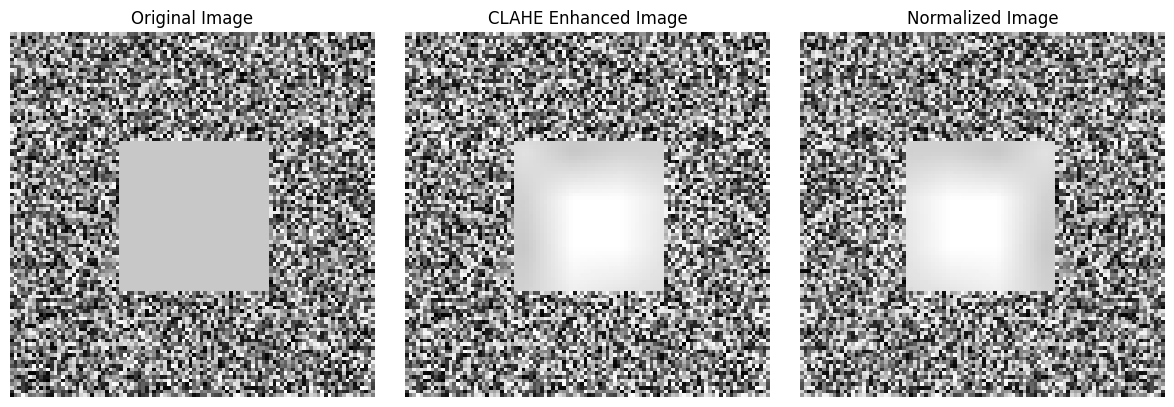

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

# Function to generate a synthetic grayscale image
def create_synthetic_image():
    # Create a blank image with noise
    image = np.random.randint(0, 256, (100, 100), dtype=np.uint8)
    # Draw a rectangle with higher intensity
    cv2.rectangle(image, (30, 30), (70, 70), 200, -1)
    return image

# Function to apply CLAHE
def apply_clahe(image):
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(image)
    return cl

# Function for normalization
def normalize_image(image):
    return image.astype(np.float32) / 255.0

# Function for data augmentation
def get_augmentation_pipeline():
    return A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
    ])

# Function for preprocessing
def preprocess_image(image, augment=False):
    # Apply CLAHE
    enhanced_image = apply_clahe(image)

    # Normalize the image
    normalized_image = normalize_image(enhanced_image)

    # Augment the image if needed
    if augment:
        aug_pipeline = get_augmentation_pipeline()
        augmented = aug_pipeline(image=normalized_image)
        normalized_image = augmented['image']

    return enhanced_image, normalized_image

# Create a synthetic image
synthetic_image = create_synthetic_image()

# Preprocess the synthetic image with augmentation
augmented = True
enhanced_image, normalized_image = preprocess_image(synthetic_image, augment=augmented)

# Display the original, CLAHE-enhanced, and normalized images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(synthetic_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('CLAHE Enhanced Image')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Normalized Image')
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
